In [1]:

import pandas as pd
import re
import nltk
import spacy
from tqdm import tqdm
from textblob import TextBlob
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [2]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load SpaCy model for sentence segmentation
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kayweeee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load dataset
df = pd.read_csv("Book Reviews.csv")

# Display dataset
df.head()

,Unnamed: 0,Book,Review,Review Date
0,0,To Kill a Mockingbird,/// gentle reminder that this is not the time ...,"March 24, 2022"
1,1,To Kill a Mockingbird,\n|\n|6.0 stars. I know I am risking a serious...,"May 24, 2011"
2,2,To Kill a Mockingbird,\n|\n|Looking for a new book but don't want to...,"December 10, 2020"
3,3,To Kill a Mockingbird,"To Kill a Mockingbird, Harper Lee|To Kill a Mo...","July 1, 2022"
4,4,To Kill a Mockingbird,Why is it when I pick up | To Kill A Mockingbi...,"October 25, 2009"


In [4]:
df.dtypes

Unnamed: 0      int64
Book           object
Review         object
Review Date    object
dtype: object

In [5]:
df.shape

(32081, 4)

In [6]:
df = df.drop(columns=['Unnamed: 0'])

df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')

df.dtypes

Book                   object
Review                 object
Review Date    datetime64[ns]
dtype: object

In [7]:
df = df.dropna(subset=['Book', 'Review'])

print(f"Dataset shape after dropping empty values: {df.shape}")

Dataset shape after dropping empty values: (31772, 3)


In [8]:
import string
import contractions

def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Expand contractions (e.g., "isn't" -> "is not")
    text = contractions.fix(text)

    # Remove unwanted special characters (but keep !, ?, and . for sentiment)
    text = re.sub(r"[^a-zA-Z0-9\s!?.,]", " ", text)

    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    return text

df['cleaned_review'] = df['Review'].astype(str).apply(clean_text)

df[['Review', 'cleaned_review']].sample(10)


,Review,cleaned_review
13642,A classic.|Sometimes classic is good.| | |Some...,a classic. sometimes classic is good. sometime...
28380,"Not as complete or as beautiful as ""Passing"", ...","not as complete or as beautiful as passing , t..."
25030,The hardest thing about reading a Don Delillo ...,the hardest thing about reading a don delillo ...
18276,I FINISHED A BOOK!!|if school books even count...,i finished a book!! if school books even count...
5970,"Дуже переоцінена книжка, де багато пафосу, шаб...",", , , . , , , . , , . , , . , . , , . , , . . ..."
31618,Another beautifully written novel by Graham Sw...,another beautifully written novel by graham sw...
1208,All the stars! Sherlock Holmes is at his inscr...,all the stars! sherlock holmes is at his inscr...
26358,Toch wel verbluft door de inventiviteit van di...,toch wel verbluft door de inventiviteit van di...
1844,The book is clearly structured. Also the choic...,the book is clearly structured. also the choic...
28252,"Φτώχεια, εξαθλίωση, πείνα, βρώμα, πολύ βρώμα, ...",", , , , , , , , , . . ."


In [9]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Detect language
df['language'] = df['Review'].astype(str).apply(detect_language)

In [10]:
df[['Review', 'cleaned_review', 'language']].sample(20)

,Review,cleaned_review,language
8341,"I hate to resort to crude Americanisms, but Al...","i hate to resort to crude americanisms, but al...",en
27618,"watermelon sugar HIGH mesmo, pq só estando mt ...","watermelon sugar high mesmo, pq s estando mt d...",pt
24369,I picked this up at the library book sale 8 or...,i picked this up at the library book sale 8 or...,en
12028,"""It is only a novel... or, in short, only some...","it is only a novel... or, in short, only some ...",en
6207,"\n|“You are You, that was what was written.”|\...","you are you, that was what was written. for th...",en
2775,Een symbolisch verhaal over verlies en verlang...,een symbolisch verhaal over verlies en verlang...,nl
13016,"“|Father is close, Mother is close, but neithe...","father is close, mother is close, but neither ...",en
22000,Totally charming and remarkably deep little bo...,totally charming and remarkably deep little bo...,en
29930,This book is gross. Sexist. Fucked up.|I also ...,this book is gross. sexist. fucked up. i also ...,en
7293,مارگریت دوراس جایی گفته بود «دوراسی وجود ندارد...,. . . . . . . . . . https avangard.ir article 313,fa


In [11]:
# Keep only English reviews
df = df[df['language'] == 'en']

df = df.drop(columns=['language'])

print(f"Dataset shape after removing non-English reviews: {df.shape}")

Dataset shape after removing non-English reviews: (23041, 4)


In [12]:
def split_into_sentences(text):
    doc = nlp(text)
    sentences = [sent.text.strip() for sent in doc.sents]
    return sentences

# Apply preprocessing and sentence segmentation
df['sentences'] = df['cleaned_review'].apply(split_into_sentences)
# Remove sentences less than 3 words

# Display example segmented sentences
df[['Review', 'sentences']].sample(5)

,Review,sentences
16624,Part 1 = Amazing. Part 2 and 3 = Is this book ...,"[part 1 amazing., part 2 and 3 is this book ov..."
843,"""Who you think you is? he say. You can't curse...","[who you think you is?, he say., you cannot cu..."
28356,I cannot stand this book. It may be technicall...,"[i cannot stand this book., it may be technica..."
8206,Everything I need to know about French history...,[everything i need to know about french histor...
25809,The plot is sparse: the narrator is a visiting...,[the plot is sparse the narrator is a visiting...


In [33]:
df.dtypes

Book                      object
Review                    object
Review Date       datetime64[ns]
cleaned_review            object
sentences                 object
dtype: object

In [13]:
# Save the cleaned dataset
df.to_csv("cleaned_book_reviews.csv", index=False)

# Data Visualization

In [1]:
import ast
import pandas as pd

df_reviews = pd.read_csv("cleaned_book_reviews.csv")

# Convert the 'sentences' column back to a list format
df_reviews['sentences'] = df_reviews['sentences'].apply(ast.literal_eval)


In [3]:
from huggingface_hub import login

# Enter your token here
huggingface_token = ""

# Authenticate with Hugging Face
login(token=huggingface_token)



In [1]:
import psutil

# Get total, available, and used memory
total_memory = psutil.virtual_memory().total / 1e9  # Convert to GB
available_memory = psutil.virtual_memory().available / 1e9  # Convert to GB

print(f"Total RAM: {total_memory:.2f} GB")
print(f"Available RAM: {available_memory:.2f} GB")


Total RAM: 8.20 GB
Available RAM: 4.82 GB


In [2]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline

# Use a lightweight model that fits in RAM
model_name = "google/flan-t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Set up pipeline
llm_pipeline = pipeline("text2text-generation", model=model, tokenizer=tokenizer)

# Test aspect extraction
prompt = "Extract key aspects from this book review: 'The plot was thrilling but the pacing was too slow.'"
response = llm_pipeline(prompt)

print(response[0]["generated_text"])


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Device set to use cpu


The plot was a bit slow but the pace was a bit slow.


In [29]:
import spacy
import nltk
from nltk.corpus import stopwords

# Load SpaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Download stopwords if not already present
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def extract_aspects_advanced(text):
    """Extract aspects using dependency parsing, filtering, and Named Entity Recognition (NER)."""
    doc = nlp(text)
    aspects = []

    for token in doc:
        # Extract meaningful nouns (subjects, objects)
        if token.pos_ in ("NOUN", "PROPN") and token.dep_ in ("nsubj", "dobj", "pobj"):
            if token.text.lower() not in stop_words and len(token.text) > 2:
                aspects.append(token.text.lower())

    # Add Named Entities (useful for book titles, author names, etc.)
    for ent in doc.ents:
        if ent.label_ in ["ORG", "PRODUCT", "WORK_OF_ART", "PERSON"]:
            aspects.append(ent.text.lower())

    return list(set(aspects))  # Remove duplicates


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kayweeee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Select one sample review
sample_review = df_reviews.iloc[5]

# Extract sentences from the sample review
sample_sentences = sample_review['sentences']
172.30.192.1
# Extract aspects from each sentence
aspect_data = []
for sentence in sample_sentences:
    aspects = extract_aspects_advanced(sentence)  # Extract aspects using advanced method
    for aspect in aspects:
        aspect_data.append((sentence, aspect))  # Store sentence-aspect pairs

# Convert to DataFrame for better visualization
import pandas as pd
aspect_df = pd.DataFrame(aspect_data, columns=['Sentence', 'Extracted Aspect'])

# Display results
print("\nFiltered Extracted Aspects from Sample Review:\n")
print(aspect_df.to_string(index=False))  # Print without default index



Filtered Extracted Aspects from Sample Review:

                                                                                                                                                                                                                                       Sentence    Extracted Aspect
                                                                                                                with endless books and infinitely more to be written in the future, it is rare occasion that i take the time to reread a novel.               novel
                                                                                                                with endless books and infinitely more to be written in the future, it is rare occasion that i take the time to reread a novel.              future
                                                                                                                with endless books and infinitely more to be written in the

In [10]:
import spacy
import nltk
from nltk.corpus import stopwords

# Load SpaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Download NLTK stopwords if not already present
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    """Removes stopwords and returns cleaned text."""
    doc = nlp(text)
    cleaned_tokens = [token.text for token in doc if token.text.lower() not in stop_words]
    return " ".join(cleaned_tokens)

def extract_aspects(text):
    """Extract noun phrases (aspects) from a cleaned sentence."""
    cleaned_text = preprocess_text(text)  # Remove stopwords first
    doc = nlp(cleaned_text)
    
    aspects = list(set(chunk.text.lower() for chunk in doc.noun_chunks if len(chunk.text) > 2))
    return aspects


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kayweeee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def extract_aspects(text):
    """Extracts noun phrases, limits length, and removes irrelevant words."""
    cleaned_text = preprocess_text(text)  # Remove stopwords
    doc = nlp(cleaned_text)
    
    aspects = []
    for chunk in doc.noun_chunks:
        aspect = chunk.lemma_.strip().lower()

        # Only keep noun phrases that are meaningful (1-3 words)
        if 1 <= len(aspect.split()) <= 3:
            aspects.append(aspect)
    
    return list(set(aspects))  # Remove duplicates

In [16]:
# Select one sample review
sample_review = df_reviews.iloc[0]

# Extract sentences from the sample review
sample_sentences = sample_review['sentences']

# Extract aspects from each sentence
aspect_data = []
for sentence in sample_sentences:
    aspects = extract_aspects(sentence)  # Extract aspects
    for aspect in aspects:
        aspect_data.append((sentence, aspect))  # Store sentence-aspect pairs

# Convert to DataFrame for better visualization
aspect_df = pd.DataFrame(aspect_data, columns=['Sentence', 'Extracted Aspect'])

# Display results in a readable format
print("\nFiltered Extracted Aspects from Sample Review:\n")
print(aspect_df.to_string(index=False))  # Print without default index



Filtered Extracted Aspects from Sample Review:

                                                                                                                                                                                                                                                 Sentence               Extracted Aspect
                                                                                                                                                                                          when i first read this book three years ago, i really liked it.                first read book
                                                                                                                   sadly, i did not write my thoughts down in an elaborate way back in the day, but i know for sure, that i did not read critically then.                        thought
                                                                                                            

In [ ]:
def extract_aspects(text):
    doc = nlp(text)
    aspects = [chunk.text for chunk in doc.noun_chunks]  # Extract noun phrases (aspects)
    return aspects

# Apply aspect extraction to each sentence
df_reviews['aspect_sentences'] = df_reviews['sentences'].apply(lambda sentences: [(aspect, sentence) 
    for sentence in sentences for aspect in extract_aspects(sentence)])

# Flatten dataset: Each row contains (aspect, sentence)
aspect_data = []
for _, row in df_reviews.iterrows():
    for aspect, sentence in row['aspect_sentences']:
        aspect_data.append((row['Book'], aspect, sentence))

# Convert to DataFrame
aspect_df = pd.DataFrame(aspect_data, columns=['Book', 'Aspect', 'Sentence'])

In [52]:
import spacy
from nltk.corpus import stopwords
import nltk

# Load SpaCy English NLP model
nlp = spacy.load("en_core_web_sm")

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def extract_aspects(text):
    doc = nlp(text)
    aspects = []
    
    for chunk in doc.noun_chunks:
        aspect = chunk.lemma_.strip().lower()  # Convert to lowercase & lemmatize

        # Remove stopwords & short words
        if aspect not in stop_words and len(aspect) > 2:
            aspects.append(aspect)

    return aspects


In [49]:
test_sentence = "The characters were well-developed, but the plot was slow."
print("Test Sentence:", test_sentence)
print("Extracted Aspects:", extract_aspects(test_sentence))


Test Sentence: The characters were well-developed, but the plot was slow.
Extracted Aspects: ['the character', 'the plot']


In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load the ABSA model and tokenizer
model_name = "yangheng/deberta-v3-base-absa-v1.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

Device set to use cpu


In [8]:
# Define aspects to analyze
aspects = ['plot', 'characters', 'writing style']

# Review sentence
sentence = "BUT ANYWAY this is a five star review and that means I don’t have to complain!!! Who knew!! All new to me."


# Run sentiment analysis for each aspect
for aspect in aspects:
    result = classifier(sentence, text_pair=aspect)
    print(f"Aspect: {aspect}, Sentiment: {result[0]['label']}, Confidence: {result[0]['score']:.4f}")

Aspect: plot, Sentiment: Neutral, Confidence: 0.7157
Aspect: characters, Sentiment: Neutral, Confidence: 0.6063
Aspect: writing style, Sentiment: Positive, Confidence: 0.9118


In [ ]:
df_reviews[['Review', 'cleaned_review', 'processed_review']].sample(5)

In [53]:
# Count unique books
num_unique_books = df['Book'].nunique()

# Count total reviews
num_total_reviews = df.shape[0]

print(f"Total Unique Books: {num_unique_books}")
print(f"Total Reviews: {num_total_reviews}")

Total Unique Books: 1096
Total Reviews: 23051


count    1096.000000
mean       21.031934
std         7.187247
min         1.000000
25%        16.000000
50%        23.000000
75%        27.000000
max        30.000000
Name: count, dtype: float64


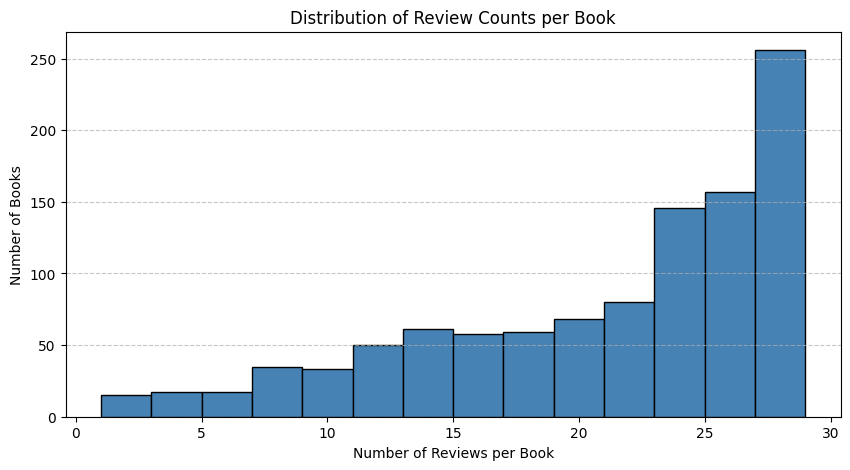

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Count reviews per book
review_counts = df['Book'].value_counts()

# Summary statistics
print(review_counts.describe())

# Plot histogram of review counts per book
plt.figure(figsize=(10, 5))
plt.hist(review_counts, bins=np.arange(1, review_counts.max() + 1, 2), color='steelblue', edgecolor='black')
plt.xlabel("Number of Reviews per Book")
plt.ylabel("Number of Books")
plt.title("Distribution of Review Counts per Book")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


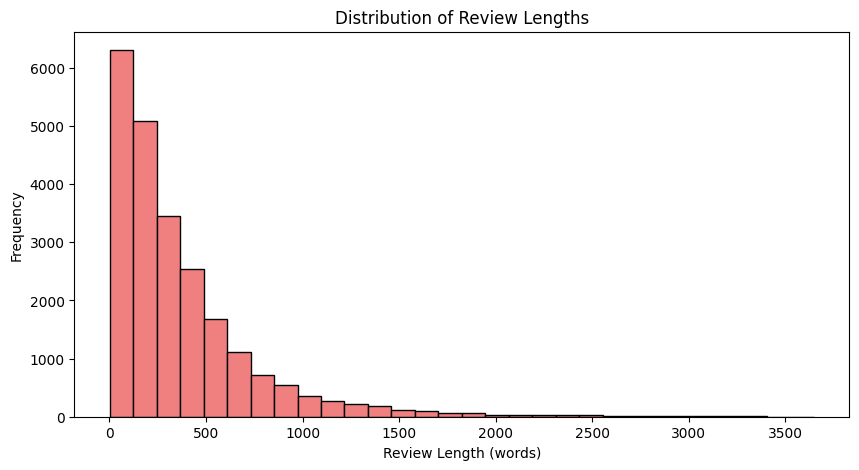

In [ ]:
# Compute review length (word count)
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))

# Plot review length distribution
plt.figure(figsize=(10, 5))
plt.hist(df['review_length'], bins=30, color='lightcoral', edgecolor='black')
plt.xlabel("Review Length (words)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()


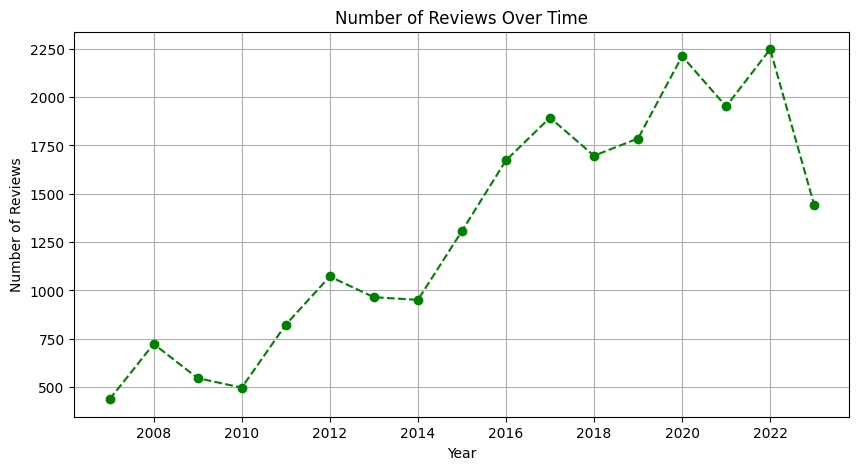

In [55]:
# Extract year from 'Review Date'
df['Review Year'] = df['Review Date'].dt.year

# Count reviews per year
reviews_per_year = df.groupby('Review Year').size()

# Plot reviews per year
plt.figure(figsize=(10, 5))
reviews_per_year.plot(kind='line', marker='o', color='green', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews Over Time")
plt.grid()
plt.show()
